 # Install Kaggle

In [ ]:
!pip install kaggle

# After running this cell, go to Kaggle, create an API key from your account settings,
# and upload the `kaggle.json` file using the 'Files' tab on the left-hand side of Colab.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the CelebA and Fashion MNIST Datasets


In [2]:
# Download CelebA dataset
!kaggle datasets download -d jessicali9530/celeba-dataset

# Download Fashion MNIST dataset
!kaggle datasets download -d zalando-research/fashionmnist

# Unzip the datasets
!unzip celeba-dataset.zip -d celeba
!unzip fashionmnist.zip -d fashion_mnist


Streaming output truncated to the last 5000 lines.
  inflating: celeba/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197617.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197618.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197619.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197620.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197621.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197622.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197623.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197624.jpg  
  inflating

#  Load the CelebA Dataset

In [4]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load image filenames
image_dir = '/content/celeba/img_align_celeba/img_align_celeba'
image_files = os.listdir(image_dir)

# Display the first few image filenames
print("Total images in CelebA dataset:", len(image_files))
print("First 5 image filenames:", image_files[:5])


Total images in CelebA dataset: 202599
First 5 image filenames: ['177345.jpg', '060771.jpg', '191361.jpg', '189106.jpg', '067241.jpg']


#  Load and Display a Sample of Images from CelebA

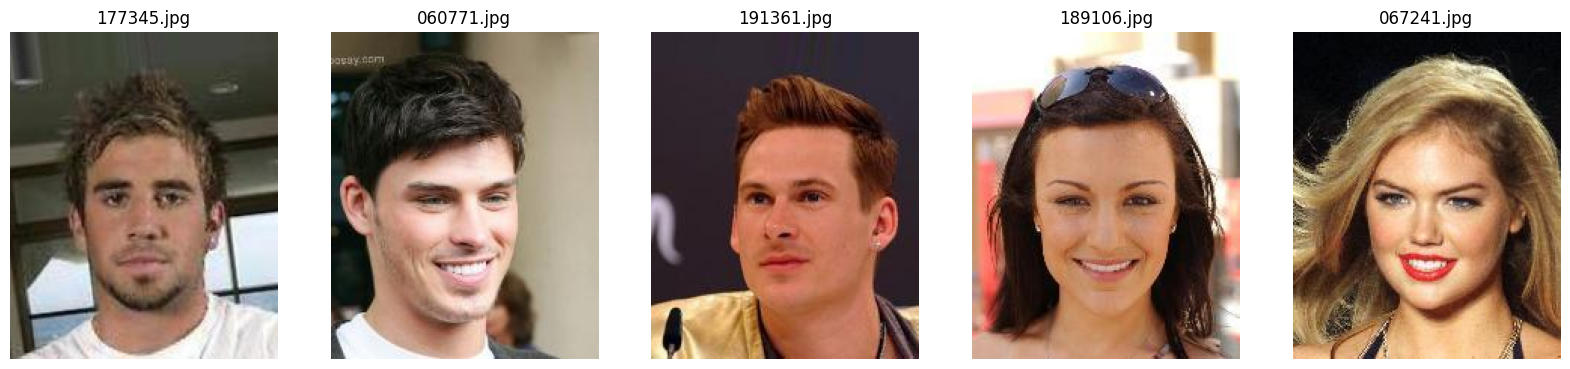

In [5]:
# Display a few sample images
sample_images = image_files[:5]

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, img_file in enumerate(sample_images):
    img = Image.open(os.path.join(image_dir, img_file))
    axs[i].imshow(img)
    axs[i].set_title(img_file)
    axs[i].axis('off')

plt.show()


#  Load the Fashion MNIST Dataset

In [6]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Display the shape of the dataset
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Define the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


#  Display a Sample of Images from Fashion MNIST

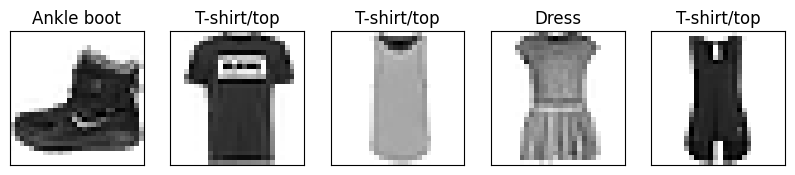

In [7]:
# Plot a few sample images from Fashion MNIST
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()


# Preprocess CelebA Images

In [8]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Define a function to preprocess CelebA images
def preprocess_celeba_images(image_files, image_dir, target_size=(28, 28)):
    processed_images = []
    for img_file in image_files:
        img = Image.open(os.path.join(image_dir, img_file))
        img = img.resize(target_size)
        img_array = img_to_array(img)
        processed_images.append(img_array)
    return np.array(processed_images)

# Preprocess a small subset of CelebA images (for demonstration)
celeba_images = preprocess_celeba_images(image_files[:500], image_dir)

# Normalize the images
celeba_images = celeba_images / 255.0

# Display the shape of the processed images
print("Processed CelebA images shape:", celeba_images.shape)


Processed CelebA images shape: (500, 28, 28, 3)


# Preprocess Fashion MNIST Images

In [9]:
# Normalize Fashion MNIST images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape Fashion MNIST images to be compatible with CelebA format (adding channel dimension)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Display the shape of the processed Fashion MNIST images
print("Processed Fashion MNIST images shape:", train_images.shape)


Processed Fashion MNIST images shape: (60000, 28, 28, 1)


# Build the Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

#  Train the Model

In [11]:
# Use the first 500 CelebA images and a small subset of Fashion MNIST labels as a demonstration
celeba_labels = np.random.choice(len(class_names), size=celeba_images.shape[0])

# Train the model (using a small number of epochs for demonstration)
history = model.fit(celeba_images, celeba_labels, epochs=35, validation_split=0.2)


Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 581ms/step - accuracy: 0.1023 - loss: 2.3098 - val_accuracy: 0.1200 - val_loss: 2.3115
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1462 - loss: 2.2786 - val_accuracy: 0.1200 - val_loss: 2.3067
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1397 - loss: 2.2695 - val_accuracy: 0.1200 - val_loss: 2.3078
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1830 - loss: 2.2587 - val_accuracy: 0.1500 - val_loss: 2.3033
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2004 - loss: 2.2176 - val_accuracy: 0.0900 - val_loss: 2.2986
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2766 - loss: 2.1822 - val_accuracy: 0.1100 - val_loss: 2.3579
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2393 - loss: 2.1273 - val_accuracy: 0.1200 - val_loss: 2.3455
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2774 - loss: 2.0486 - val_accuracy: 0.0700 - val_lo

# Plot Training and Validation Accuracy

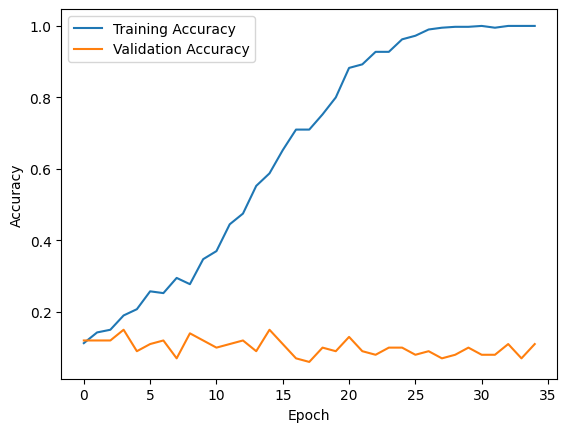

In [12]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.10      0.08      0.09        12
     Trouser       0.05      0.20      0.08         5
    Pullover       0.22      0.17      0.19        12
       Dress       0.10      0.08      0.09        12
        Coat       0.11      0.07      0.09        14
      Sandal       0.29      0.20      0.24        10
       Shirt       0.29      0.20      0.24        10
     Sneaker       0.09      0.20      0.13         5
         Bag       0.00      0.00      0.00        10
  Ankle boot       0.00      0.00      0.00        10

    accuracy                           0.11       100
   macro avg       0.12      0.12      0.11       100
weighted avg       0.13      0.11      0.11       100



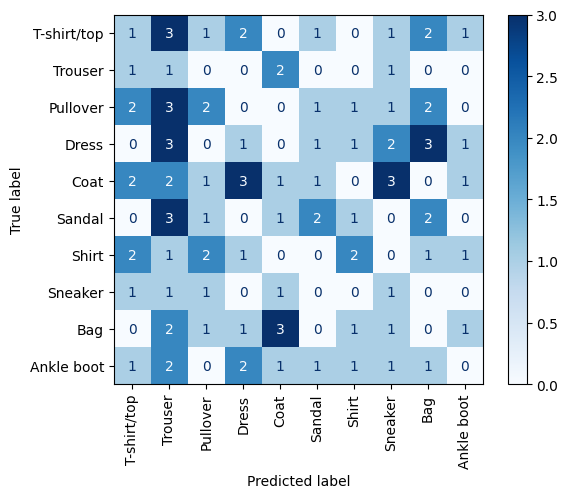

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming 20% of the data was used for validation
val_size = int(0.2 * celeba_images.shape[0])

# Generate predictions on the validation set
val_images = celeba_images[-val_size:]
val_labels = celeba_labels[-val_size:]

predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(val_labels, predicted_labels, labels=np.arange(len(class_names)))

# Generate the classification report
report = classification_report(val_labels, predicted_labels, target_names=class_names)
# Print the classification report
print("Classification Report:\n")
print(report)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

# Make Recommendations for New Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


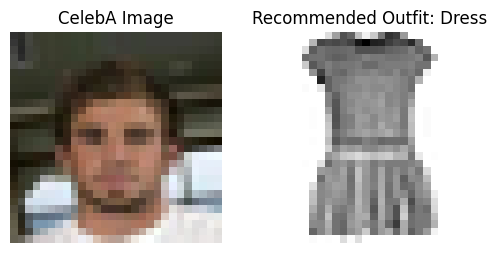

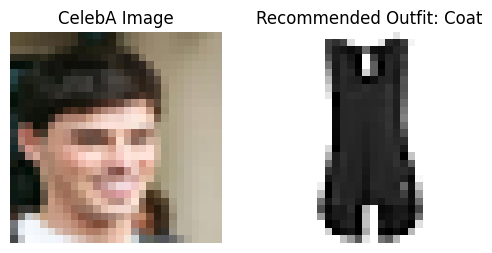

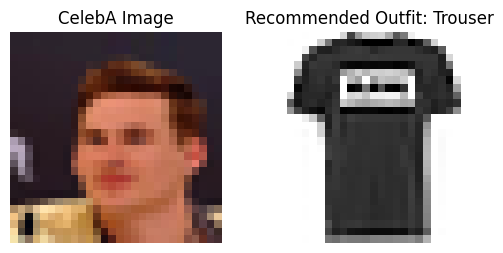

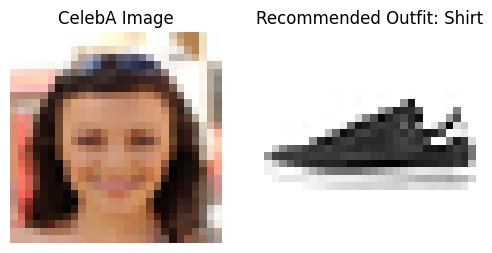

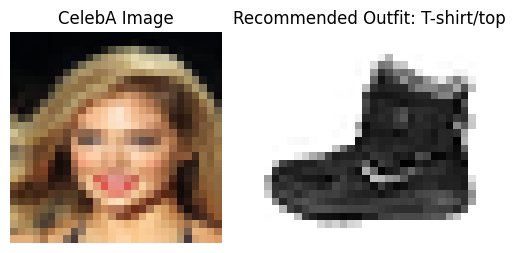

In [14]:
# Make predictions on the test set
predictions = model.predict(celeba_images[:5])

# Display the predictions alongside the original CelebA images
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plt.imshow(array_to_img(celeba_images[i]))
    plt.title("CelebA Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(train_images[np.argmax(predictions[i])], cmap=plt.cm.binary)
    plt.title(f"Recommended Outfit: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')

    plt.show()
